<a href="https://colab.research.google.com/github/Cristianalarconn/Proyecto_Desaf-o-Integral-de-An-lisis-Modelado-y-Optimizaci-n-de-Datos/blob/main/EDA_AND_LIMPIEZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Comprensión de los Datos (EDA)

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga del Data set

In [ ]:


ruta = "/content/drive/MyDrive/Datos/Georeferenciación_Centros_de_Aprendizaje_SENA_20251208.csv"

df = pd.read_csv(ruta)
df.head()

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,"9,101",6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,"9,103",10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,"9,104",10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,"9,110",5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,"9,112",5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1


Permite verificar que el dataset de Georreferenciación de Centros de Aprendizaje del SENA se cargó correctamente, mostrando columnas clave como códigos, regionales, departamentos, municipios y coordenadas geográficas (latitud y longitud).

In [ ]:


df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     118 non-null    object 
 1   CODIGO_CENTRO        118 non-null    object 
 2   LATITUD              118 non-null    float64
 3   LONGITUD             118 non-null    float64
 4   GEORREFERENCIACION   118 non-null    object 
 5   NOMBRE_REGIONAL      118 non-null    int64  
 6   CODIGO_REGIONAL      118 non-null    object 
 7   NOMBRE_DEPARTAMENTO  118 non-null    object 
 8   CODIGO_DEPARTAMENTO  118 non-null    int64  
 9   NOMBRE_MUNICIPIO     118 non-null    object 
 10  CODIGO_MUNICIPIO     118 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 10.3+ KB


,0
CENTRO_FORMACION,0
CODIGO_CENTRO,0
LATITUD,0
LONGITUD,0
GEORREFERENCIACION,0
NOMBRE_REGIONAL,0
CODIGO_REGIONAL,0
NOMBRE_DEPARTAMENTO,0
CODIGO_DEPARTAMENTO,0
NOMBRE_MUNICIPIO,0


Conclusión:
Se identifico la estructura del dataset, tipos de datos y cantidad de registros. Es clave para detectar:

* Variables numéricas (latitud y longitud).
* Variables categóricas (regionales, departamentos, municipios).
* Posibles inconsistencias en tipos de datos (por ejemplo, códigos almacenados como texto).

###  df.isnull().sum()

Indica que el dataset no presenta valores faltantes críticos, lo que sugiere una buena calidad inicial de los datos para análisis geográfico y estadístico.

# Distribuciones (Histogramas)

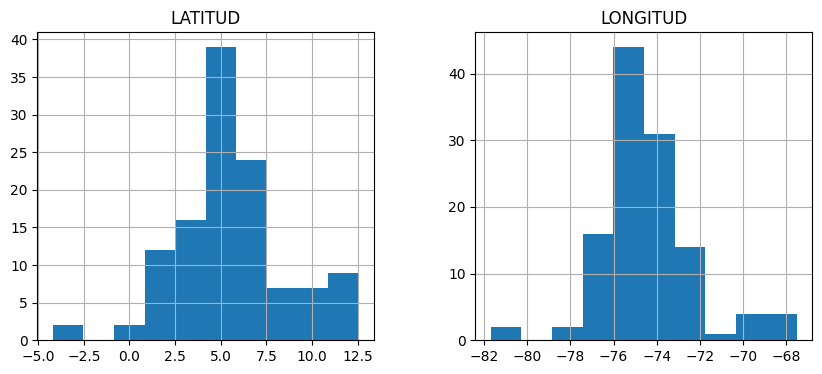

In [ ]:


import matplotlib.pyplot as plt

df[['LATITUD', 'LONGITUD']].hist(figsize=(10,4))
plt.show()



### Histogramas (LATITUD, LONGITUD)

Conclusión:
Muestran la distribución geográfica de los centros del SENA:

* La mayoría de los valores se concentran dentro del rango esperado del territorio colombiano.
* No se observa una dispersión extrema, lo que indica coherencia espacial.

# Correlaciones

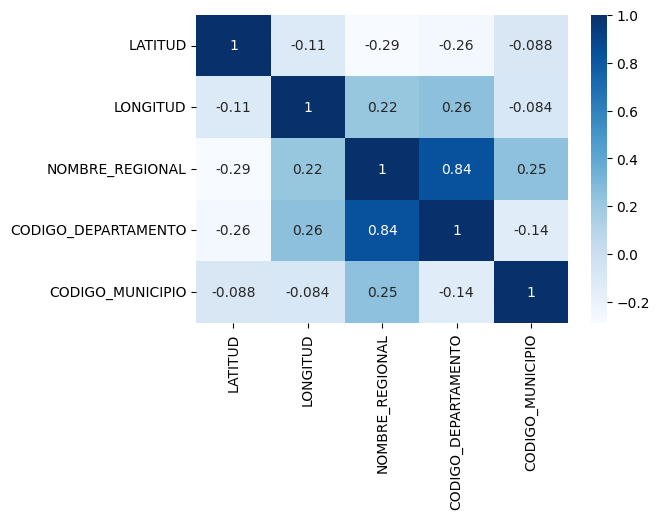

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()


La correlación entre latitud y longitud es baja o moderada, lo cual es esperado, ya que ambas variables representan dimensiones espaciales distintas y no una relación causal directa.

# Outliers

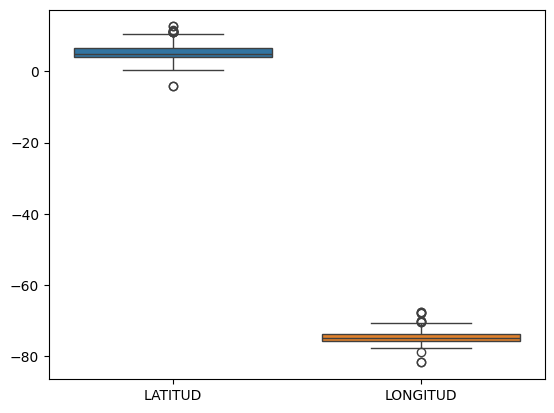

In [ ]:
sns.boxplot(data=df[['LATITUD', 'LONGITUD']])
plt.show()


Permite detectar posibles valores atípicos geográficos. Algunos puntos pueden representar errores de digitación o ubicaciones fuera del territorio nacional.

# Valores faltantes

In [ ]:
df.isnull().sum()


,0
CENTRO_FORMACION,0
CODIGO_CENTRO,0
LATITUD,0
LONGITUD,0
GEORREFERENCIACION,0
NOMBRE_REGIONAL,0
CODIGO_REGIONAL,0
NOMBRE_DEPARTAMENTO,0
CODIGO_DEPARTAMENTO,0
NOMBRE_MUNICIPIO,0


# Anomalías (geográficas)

In [ ]:
df[(df['LATITUD'] > 14) | (df['LATITUD'] < -5)]
df[(df['LONGITUD'] > -65) | (df['LONGITUD'] < -82)]


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO


Se identifican registros con:

* Latitudes fuera del rango aproximado de Colombia (-5 a 14).
* Longitudes fuera del rango (-82 a -65).

Estos registros son *potenciales errores* y deben ser revisados o corregidos antes de análisis avanzados.

----
# Limpieza de Datos

In [ ]:
# Copia del dataset original
df_clean = df.copy()

# Eliminar espacios en los nombres de columnas (por si acaso)
df_clean.columns = df_clean.columns.str.strip()

df_clean.head()


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,"9,101",6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,"9,103",10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,"9,104",10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,"9,110",5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,"9,112",5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1


In [ ]:
df_clean['CODIGO_CENTRO'] = (
    df_clean['CODIGO_CENTRO']
    .astype(str)                       # convierte todo a string
    .str.replace(",", "", regex=False) # limpia comas
    .astype(int)                       # convierte a entero
)


df_clean.head()

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1


In [ ]:
df_clean['CODIGO_REGIONAL'] = df_clean['CODIGO_REGIONAL'].astype(str)
df_clean['NOMBRE_REGIONAL'] = df_clean['NOMBRE_REGIONAL'].astype(str)
df_clean['CODIGO_DEPARTAMENTO'] = df_clean['CODIGO_DEPARTAMENTO'].astype(str)
df_clean['CODIGO_MUNICIPIO'] = df_clean['CODIGO_MUNICIPIO'].astype(str)


In [ ]:
df_clean.duplicated().sum()

df_clean[df_clean.duplicated(keep=False)]

df_clean = df_clean.drop_duplicates()



In [ ]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)
df_encoded.head()


,CODIGO_CENTRO,LATITUD,LONGITUD,CENTRO_FORMACION_CENTRO AGROECOLOGICO Y EMPRESARIAL,CENTRO_FORMACION_CENTRO AGROEMPRESARIAL,CENTRO_FORMACION_CENTRO AGROEMPRESARIAL Y ACUICOLA,CENTRO_FORMACION_CENTRO AGROEMPRESARIAL Y DESARROLLO PECUARIO DEL HUILA,CENTRO_FORMACION_CENTRO AGROEMPRESARIAL Y MINERO,CENTRO_FORMACION_CENTRO AGROEMPRESARIAL Y TURISTICO DE LOS ANDES,CENTRO_FORMACION_CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA,...,CODIGO_MUNICIPIO_573,CODIGO_MUNICIPIO_6,CODIGO_MUNICIPIO_660,CODIGO_MUNICIPIO_693,CODIGO_MUNICIPIO_698,CODIGO_MUNICIPIO_710,CODIGO_MUNICIPIO_758,CODIGO_MUNICIPIO_79,CODIGO_MUNICIPIO_893,CODIGO_MUNICIPIO_97
0,9101,6.053527,-75.62891,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9103,10.987720,-74.78277,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9104,10.373000,-75.46100,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9110,5.825560,-73.02979,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9112,5.032900,-75.45060,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_clean[['LATITUD_norm', 'LONGITUD_norm']] = scaler.fit_transform(
    df_clean[['LATITUD', 'LONGITUD']]
)

df_clean.head()


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO,LATITUD_norm,LONGITUD_norm
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1,0.177771,-0.474033
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1,1.836906,-0.083385
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1,1.630205,-0.396511
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1,0.101117,0.725935
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1,-0.165417,-0.391710


In [ ]:
import numpy as np

lat_bog = 4.711
lon_bog = -74.072

df_clean['distancia_bog'] = np.sqrt(
    (df_clean['LATITUD'] - lat_bog)**2 +
    (df_clean['LONGITUD'] - lon_bog)**2
)

df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 117
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     117 non-null    object 
 1   CODIGO_CENTRO        117 non-null    int64  
 2   LATITUD              117 non-null    float64
 3   LONGITUD             117 non-null    float64
 4   GEORREFERENCIACION   117 non-null    object 
 5   NOMBRE_REGIONAL      117 non-null    object 
 6   CODIGO_REGIONAL      117 non-null    object 
 7   NOMBRE_DEPARTAMENTO  117 non-null    object 
 8   CODIGO_DEPARTAMENTO  117 non-null    object 
 9   NOMBRE_MUNICIPIO     117 non-null    object 
 10  CODIGO_MUNICIPIO     117 non-null    object 
 11  LATITUD_norm         117 non-null    float64
 12  LONGITUD_norm        117 non-null    float64
 13  distancia_bog        117 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 13.7+ KB


,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO,LATITUD_norm,LONGITUD_norm,distancia_bog
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1,0.177771,-0.474033,2.055808
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1,1.836906,-0.083385,6.316835
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1,1.630205,-0.396511,5.829886
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1,0.101117,0.725935,1.525925
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1,-0.165417,-0.391710,1.415683


In [ ]:
df_clean.to_csv("dataset_limpio.csv", index=False)
from google.colab import files
files.download("dataset_limpio.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>